***

Profesor: Gonzalo A. Ruz, PhD

Curso: Aprendizaje Automático

Curso basado en el libro Introduction to Machine Learning with Python by Andreas Mueller and Sarah Guido.

***

In [1]:
# Global imports and settings
%matplotlib inline

In [2]:
# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)
warnings.simplefilter(action="ignore", category=DeprecationWarning)


# Clase 2: Aprendizaje de ensambles


## Árboles

#### Árboles de Decisión (Decision Trees)
* Representación: vamos a suponer que podemos representar el concepto que queremos aprender con un _árbol de decisión_
    * Divida (split) repetidamente los datos en función de una característica a la vez
* Evaluación (función de pérdida): un árbol es mejor que otro árbol según alguna heurística
    * Clasificación: las instancias en una hoja son todas de la misma clase (hojas `puras`)
    * Regresión: las instancias en una hoja tienen valores cercanos entre sí
* Optimización: recursiva, heurística de búsqueda glotona (algoritmo de Hunt)
    * Haga la primera división basada en la heurística
    * En cada rama, repita la división de la misma manera

In [3]:
pip install mglearn

     |████████████████████████████████| 540 kB 4.6 MB/s eta 0:00:01
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=e3d2892451b82797fa8178b50dffa5d28f3efe8cfb3c55aef60523f6a0bef3fd
  Stored in directory: /Users/educarrasco/Library/Caches/pip/wheels/df/30/8a/1e2c8f144c9d411b0688f628d496d2db8f61b6d14bcedaa1df
Successfully built mglearn
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install graphviz

     |████████████████████████████████| 47 kB 2.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

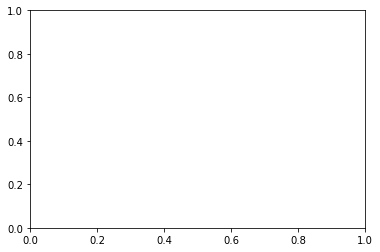

In [6]:
import mglearn
mglearn.plots.plot_animal_tree()

### Algortimo de Hunt

![](https://drive.google.com/uc?id=1xX81f8clwzLzO_wA8HWgEa5GN5bY0Lpa)

#### Clasificación usando un árbol de decisión
¿Dónde harías la primera división?

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

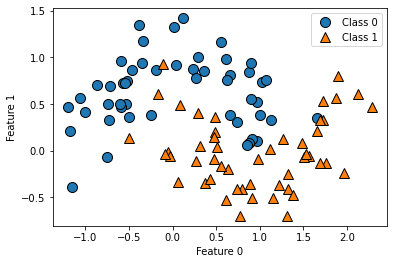

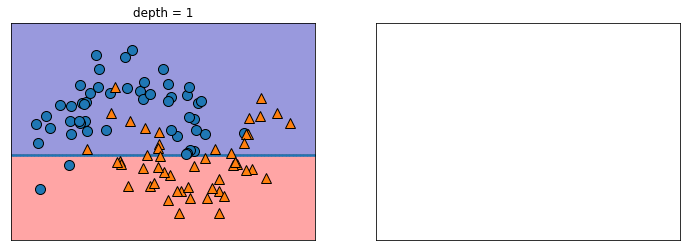

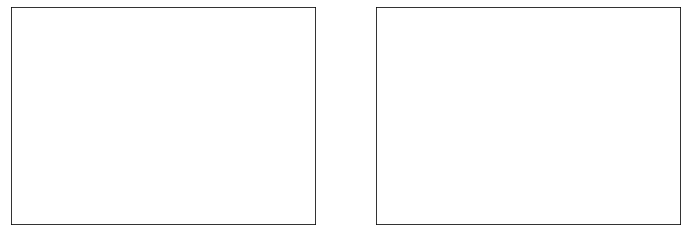

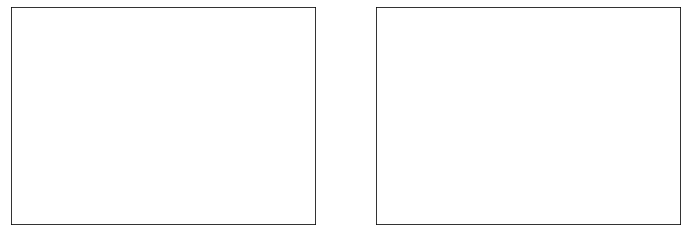

In [7]:
mglearn.plots.plot_tree_progressive()

### Heurísticas
* Partimos de un conjunto de datos de $n$ puntos $D = \{(x_i,y_i)\}_{i=1}^{n}$ donde $y_i$ es una de las $k$ clases 
* Considere divisiones entre puntos de datos adyacentes de diferentes clases, para cada variable
* Después de la partición, cada hoja tendrá $\hat{p}_k$ = la frecuencia relativa de la clase $k$

Podemos definir varias *medidas de impurezas*:

- Error de clasificación errónea (conduce a árboles más grandes):
$ 1 - \underset{k}{\operatorname{argmax}} \hat{p}_{k} $

- Índice de Gini:
$ \sum_{k\neq k'} \hat{p}_k \hat{p}_{k'} = \sum_{k=1}^K \hat{p}_k(1-\hat{p}_k) $

- Suma de la heurística por hoja, ponderada por el número de ejemplos en cada hoja.

$$ \sum_{l=1}^L \frac{|X_{i=l}|}{|X_{i}|} Gini(X_{i=l}) $$

Visualización: los gráficos de la derecha muestran la distribución de clases de la hoja 'superior' e 'inferior', respectivamente.

In [9]:
import matplotlib.pyplot as plt
import numpy as np

from __future__ import print_function
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)


def misclassification_error(leaf1_distr, leaf2_distr, leaf1_size, leaf2_size):
    total = leaf1_size + leaf2_size
    return leaf1_size/total * (1 - max(leaf1_distr)) + leaf2_size/total * (1 - max(leaf2_distr))

def gini_index(leaf1_distr, leaf2_distr, leaf1_size, leaf2_size):
    total = leaf1_size + leaf2_size
    return leaf1_size/total * np.array([leaf1_distr[k]*(1-leaf1_distr[k]) for k in range(0,2)]).sum() + \
            leaf2_size/total * np.array([leaf2_distr[k]*(1-leaf2_distr[k]) for k in range(0,2)]).sum()

@interact
def plot_heuristics(split=(-0.5,1.5,0.05)):
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                           subplot_kw={'xticks': (), 'yticks': ()})
    mglearn.tools.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax[0])
    ax[0].plot([min(X[:, 0]),max(X[:, 0])],[split,split])

    ind = np.arange(2)
    width = 0.35
    top, bottom = y[np.where(X[:, 1]>split)], y[np.where(X[:, 1]<=split)]
    top_0, top_1 = (top == 0).sum()/len(top), (top == 1).sum()/len(top)
    bottom_0, bottom_1 = (bottom == 0).sum()/len(bottom), (bottom == 1).sum()/len(bottom)
    ax[1].barh(ind, [bottom_1,top_1], width, color='r')
    for i, v in enumerate([bottom_1,top_1]):
        ax[1].text(0, i, 'p_1={:.2f}'.format(v), color='black', fontweight='bold')
    ax[1].barh(ind+width, [bottom_0,top_0], width, color='royalblue')
    for i, v in enumerate([bottom_0,top_0]):
        ax[1].text(0, i + width, 'p_0={:.2f}'.format(v), color='black', fontweight='bold')
    error = misclassification_error([top_0,top_1],[bottom_0,bottom_1],len(top),len(bottom))
    gini = gini_index([top_0,top_1],[bottom_0,bottom_1],len(top),len(bottom))
    ax[1].set_title("Misclass. Error:{:.2f}, Gini:{:.2f}".format(error, gini))

interactive(children=(FloatSlider(value=0.5, description='split', max=1.5, min=-0.5, step=0.05), Output()), _d…

- La entropía (del atributo de clase) mide *la imprevisibilidad* de los datos:
    - ¿Qué tan probable será que un ejemplo aleatorio tenga clase k?
$$ E(X) = -\sum_{k=1}^K \hat{p}_k \log_{2}\hat{p}_k $$

- La ganancia de información (también conocida como divergencia de Kullback-Leibler) mide la cantidad de entropía que se ha reducido al dividir el atributo $X_i$:
$$ G(X,X_i) = E(X) - \sum_{l=1}^L \frac{|X_{i=l}|}{|X_{i}|} E(X_{i=l}) $$

con $X$ = el conjunto de entrenamiento, $l$ una hoja específica después de dividir el atributo $X_i$, $X_{i=l}$ es el conjunto de ejemplos en la hoja $l$: $\{x \in X | X_i \in l\}$

Heurística visualizada (clase binaria)
- Notar que `gini != entropy/2`

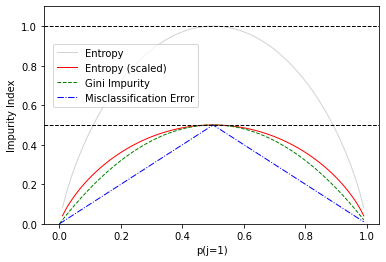

In [10]:
def gini(p):
   return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
   return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

def classification_error(p):
   return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
scaled_ent = [e*0.5 if e else None for e in ent]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, scaled_ent, gini(x), c_err],
      ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
      ['-', '-', '--', '-.'],
      ['lightgray', 'red', 'green', 'blue']):
   line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')
plt.show()

### Ejemplo
Calculemos la ganancia de información para un conjunto de datos con características categóricas:

Ex.| 1 | 2 | 3 | 4 | 5 | 6
---|---|---|---|---|---|---
a1 | T | T | T | F | F | F
a2 | T | T | F | F | T | T
class | + | + | - | + | - | -

$E(X)$ ?  
$G(X, X_{a2})$ ?  
$G(X, X_{a1})$ ?

$E(X)$ = $-(\frac{1}{2}*log_2(\frac{1}{2})+\frac{1}{2}*log_2(\frac{1}{2})) = 1$ (las clases tienen las mismas probabilidades)    
$G(X, X_{a2})$ = 0 (después de la división, las clases aún tienen las mismas probabilidades, la entropía se mantiene en 1)

Ex.| 1 | 2 | 3 | 4 | 5 | 6
---|---|---|---|---|---|---
a1 | T | T | T | F | F | F
a2 | T | T | F | F | T | T
class | + | + | - | + | - | -

$$ E(X) = -\sum_{k=1}^K \hat{p}_k \log\hat{p}_k \quad , \quad G(X,X_i) = E(X) - \sum_{v=1}^V \frac{|X_{i=v}|}{|X_{i}|} E(X_{i=v}) $$

$$E(X_{a1=T}) = - \frac{2}{3} \log_{2}(\frac{2}{3}) - \frac{1}{3} \log_{2}(\frac{1}{3}) = 0.9183 \quad (= E(X_{a1=F}))$$
$$G(X, X_{a1}) = 1 - \frac{1}{2} 0.9183 - \frac{1}{2} 0.9183 = 0.0817 $$

por lo tanto, dividimos en a1

#### Heurística en scikit-learn

El criterio de división se puede establecer con la opción `criterion` en` DecisionTreeClassifier`

- `gini` (default): gini impurity index
- `entropy`: information gain

El mejor valor depende del conjunto de datos, así como de otros hiperparámetros.

In [33]:
#bloque para generar los plots de los clasificadores
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

def plot_classifiers(names, classifiers, figuresize):
    h = .02  # step size in the mesh
    X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
    rng = np.random.RandomState(2)
    X += 2 * rng.uniform(size=X.shape)
    linearly_separable = (X, y)

    datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]
    figure = plt.figure(figsize=figuresize)
    i = 1
    
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=.4, random_state=42)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data")
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
    
        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1
        
    plt.tight_layout()
    plt.show()

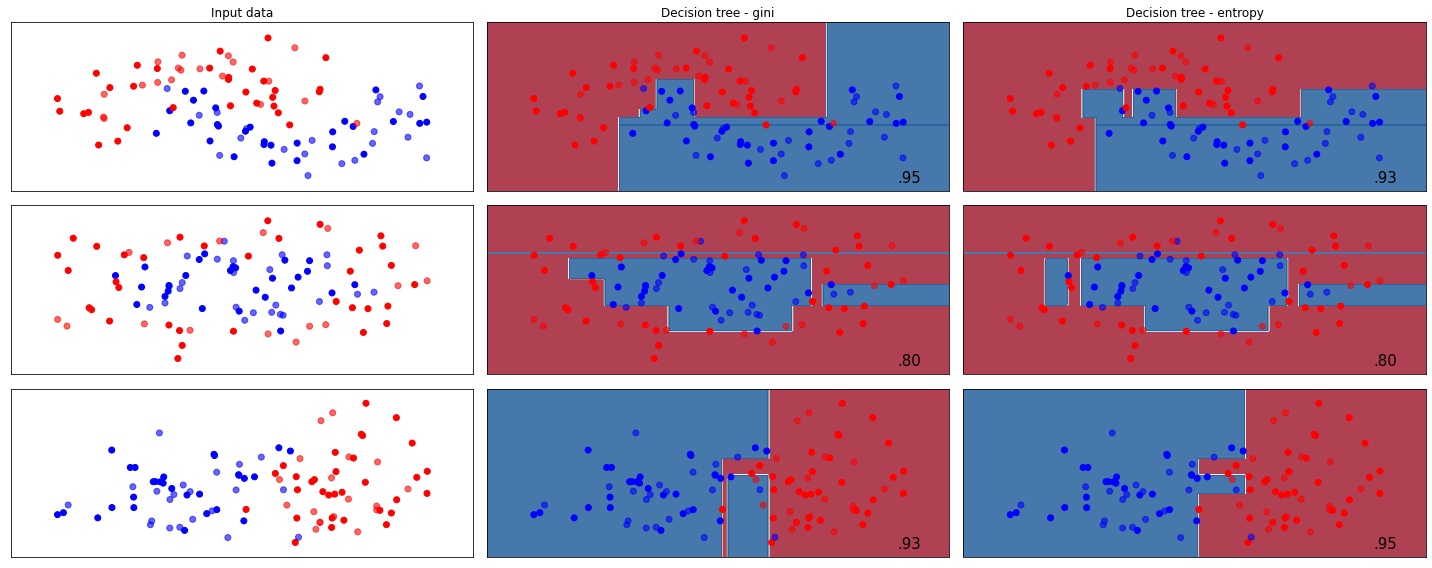

In [34]:
from sklearn.tree import DecisionTreeClassifier
names = ["Decision tree - gini", "Decision tree - entropy"]

classifiers = [
    DecisionTreeClassifier(),
    DecisionTreeClassifier(criterion="entropy")
    ]

plot_classifiers(names, classifiers, figuresize=(20,8))

### Manejo de atributos de muchos valores
¿Qué sucede cuando una característica categórica tiene (casi) tantos valores como ejemplos?
- La ganancia de información lo seleccionará

Un enfoque: use Gain Ratio en su lugar (no disponible scikit-learn):
$$ GainRatio(X,X_i) = \frac{Gain(X,X_i)}{SplitInfo(X,X_i)}$$  
$$ SplitInfo(X,X_i) = - \sum_{v=1}^V \frac{|X_{i=v}|}{|X|} log_{2} \frac{|X_{i=v}|}{|X|} $$

donde $X_{i=v}$ es el subconjunto de ejemplos para los cuales la característica $X_i$ tiene el valor v.

SplitInfo será grande si $X_i$ fragmenta los datos en muchos subconjuntos pequeños, lo que resulta en una Gain Ratio más pequeña.

### Overfitting: Controlando la complejidad de los árboles de decisión
Los árboles de decisión pueden sobreajustar muy fácilmente en los datos. Estrategias de regularización: 

* Pre-pruning: detener la creación de nuevas hojas en algún momento
    * Limitar la profundidad del árbol o el número de hojas
    * Requerir un tamaño de hoja mínimo (número de instancias) para permitir una división
* Post-pruning: construir un árbol completo, luego podar (unir) hojas
    * Reducción de errores de poda: evaluar contra datos hold-out
    * Existen muchas otras estrategias. 
    * scikit-learn no admite ninguna de ellas (todavía)

Efectos de pre-pruning:
* Los árboles poco profundos tienden a no ajustarse (sesgo alto)
* Los árboles profundos tienden a sobreajustarse (alta variación)

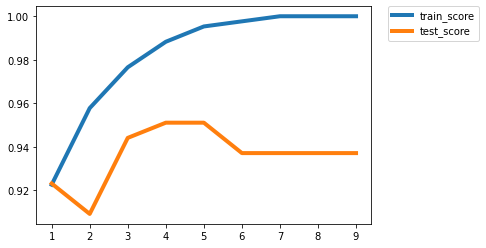

In [35]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
train_score, test_score = [],[]
for depth in range(1,10):
    tree = DecisionTreeClassifier(random_state=0, max_depth=depth).fit(X_train, y_train)
    train_score.append(tree.score(X_train, y_train))
    test_score.append(tree.score(X_test, y_test))
plt.plot(range(1,10), train_score, label="train_score", linewidth=4)
plt.plot(range(1,10), test_score, label="test_score", linewidth=4)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.);

Los árboles de decisión son fáciles de interpretar

- Por ejemplo se puede visualizar y encontrar la ruta que toma la mayoría de los datos

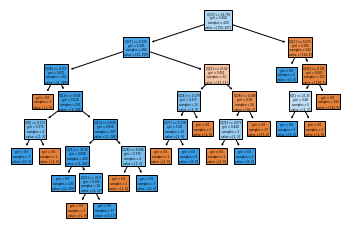

In [36]:
from sklearn.tree import plot_tree, DecisionTreeClassifier
arbol = DecisionTreeClassifier().fit(X_train, y_train)
plot_tree(arbol,filled=True)
plt.show()

In [37]:
X_train.shape

(426, 30)

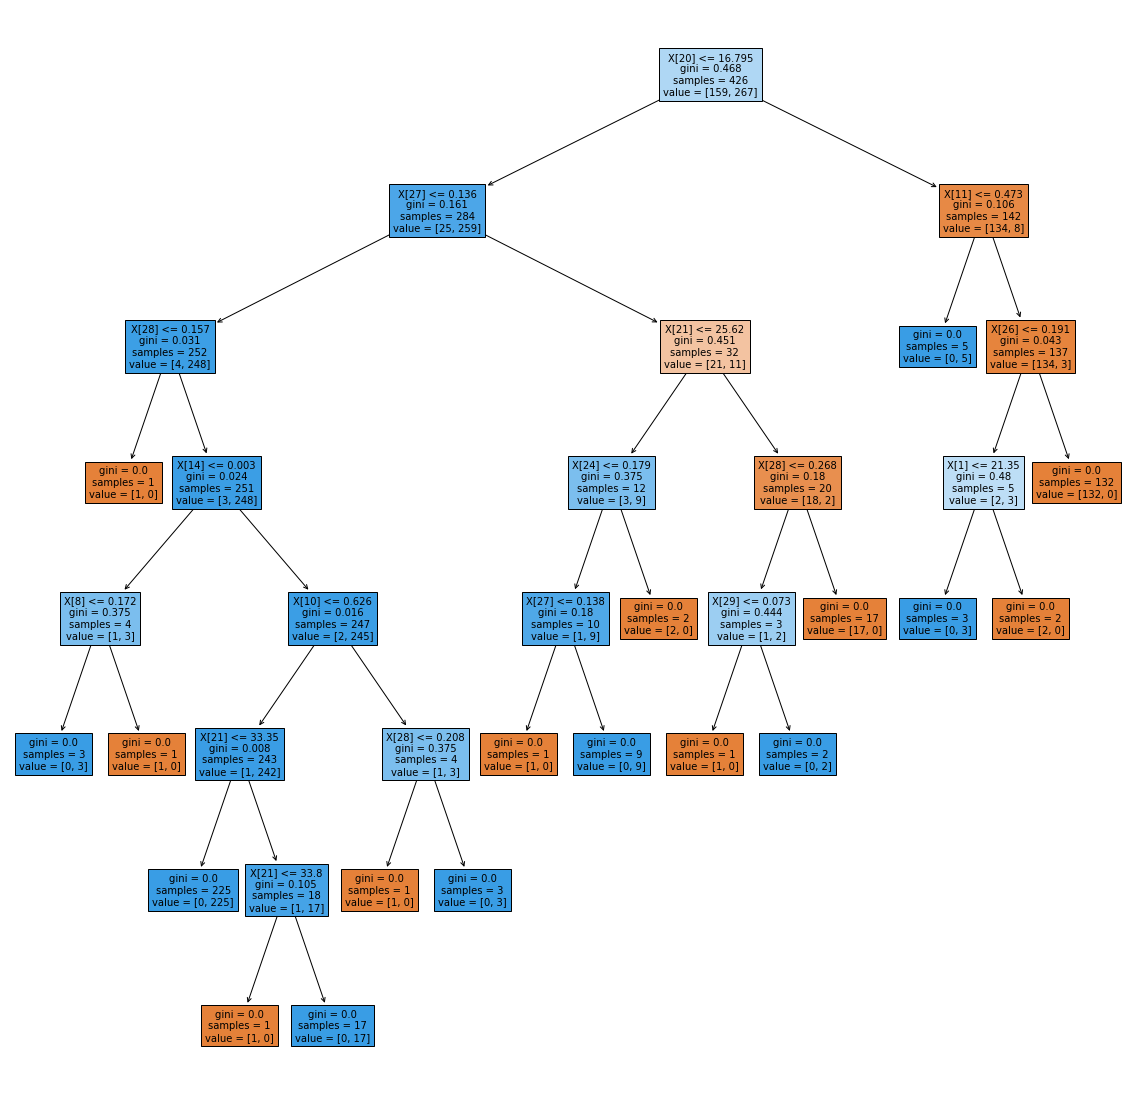

In [38]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20))
plot_tree(arbol, fontsize=10,filled=True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

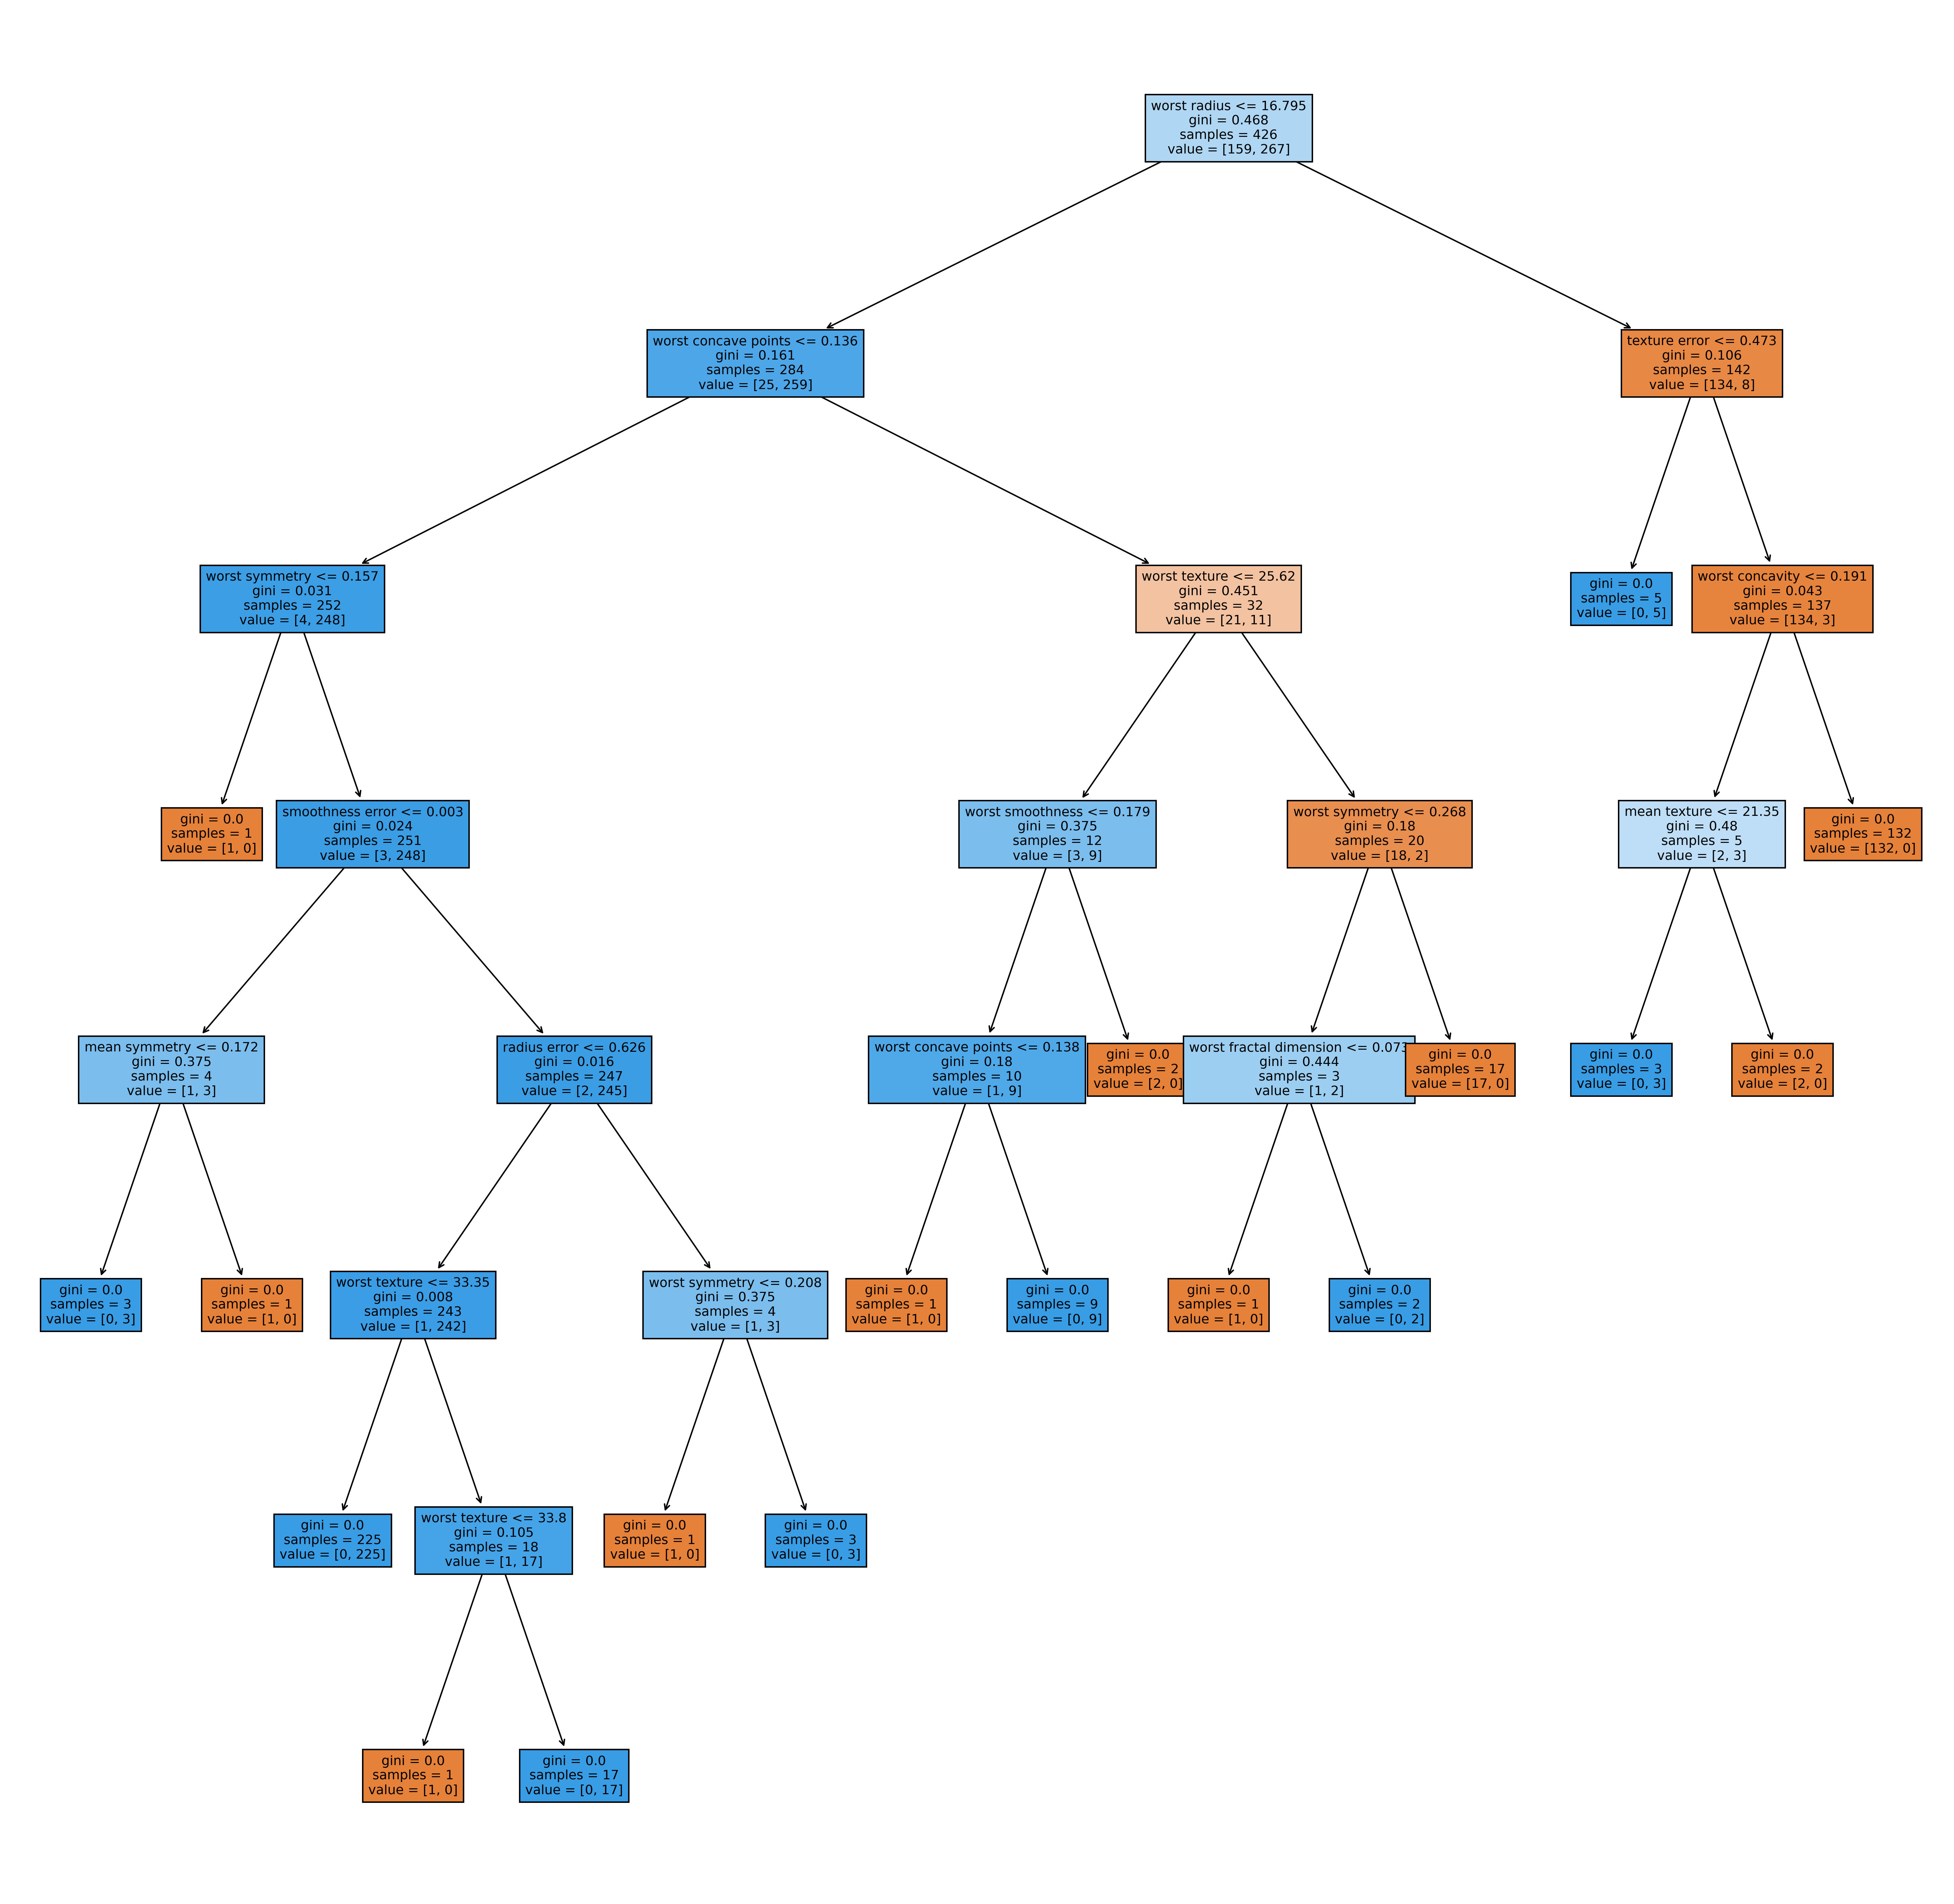

In [39]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (24,24), dpi=300)
plot_tree(arbol, feature_names=cancer.feature_names,fontsize=9,filled=True)
fig.savefig('/content/drive/My Drive/Colab Notebooks/Aprendizaje Automático/2022/clase2/arbol.png')

`DecisionTreeClassifier` también devuelve _feature importances_

``` python
tree.feature_importances_
```

* En [0,1], suma 1
* Valores altos para atributos seleccionados tempranamente (cerca de la raíz)

In [40]:
# Feature importances sum up to 1
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


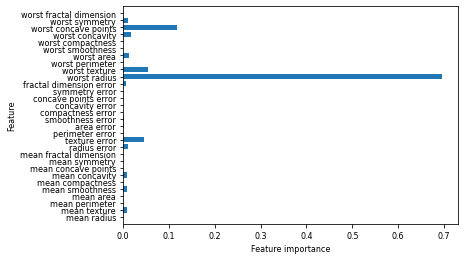

In [41]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plt.rcParams.update({'font.size': 8})
plot_feature_importances_cancer(tree)

### Regresión usando árbol de decisión
- Heurística: *Distancia cuadrática mínima*
- Considere divisiones en cada punto de datos para cada variable (o a mitad de camino)
- Dividir los datos en $X_j$ en el punto de división $s$ conduce a los siguientes medios-espacios:

$$ R_1(j, s) = { X : X_j \leq s} \quad y \quad R_2(j, s) = { X : X_j > s} $$
    
- La mejor división, con el valor predicho $c_i$ (media de todos los valores en la hoja) y el valor real $y_i$:

$$ \min_{j,s} \left(\min_{c_1} \sum_{x_{i} \in R_1(j,s)} (y_i - c_1)^2 + \min_{c_2} \sum_{x_{i} \in R_2(j,s)} (y_i - c_2)^2 \right) $$

- Suponiendo que el árbol predice $y_i$ como el promedio de todos los $x_i$ en la hoja:
    
$$ \hat{c}_1 = \text{avg}(y_i | x_{i} \in R_1(j,s)) \quad y \quad \hat{c}_2 = \text{avg}(y_i | x_{i} \in R_2(j,s)) $$

con $x_i$ siendo el i-ésimo ejemplo en los datos, con el valor objetivo $y_i$

#### En scikit-learn
Regresión se realiza con  `DecisionTreeRegressor`

In [42]:
def plot_decision_tree_regression(regr_1, regr_2):
    # Create a random dataset
    rng = np.random.RandomState(1)
    X = np.sort(5 * rng.rand(80, 1), axis=0)
    y = np.sin(X).ravel()
    y[::5] += 3 * (0.5 - rng.rand(16))

    # Fit regression model
    regr_1.fit(X, y)
    regr_2.fit(X, y)

    # Predict
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_1 = regr_1.predict(X_test)
    y_2 = regr_2.predict(X_test)

    # Plot the results
    plt.figure(figsize=(8,6))
    plt.scatter(X, y, c="darkorange", label="data")
    plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
    plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()

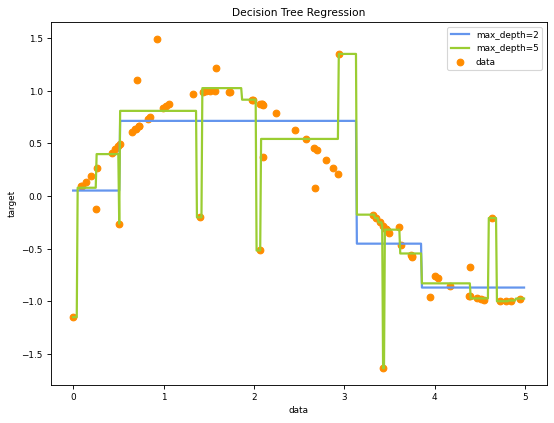

In [43]:
from sklearn.tree import DecisionTreeRegressor
plt.rcParams['figure.dpi'] = 80 
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

plot_decision_tree_regression(regr_1,regr_2)

Hay que tener en cuenta que los árboles de decisión no extrapolan bien.

- Las hojas devuelven el mismo valor _promedio_ sin importar cuán lejos se encuentre el nuevo punto de datos de los ejemplos de entrenamiento.
- Ejemplo usando `ram_price` forecasting dataset

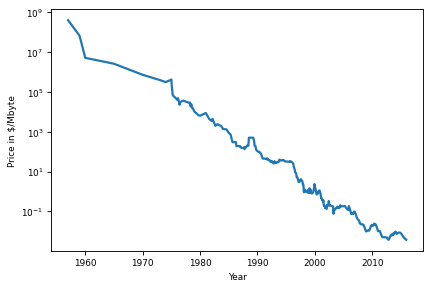

In [48]:
import pandas as pd
ram_prices = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Aprendizaje Automático/2022/clase2/data/ram_price.csv')

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte");

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date:
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

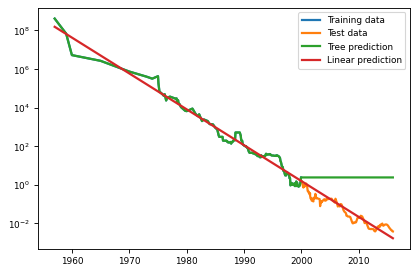

In [50]:
plt.rcParams['lines.linewidth'] = 2
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend();

#### Fortalezas, debilidades y parámetros.
Árboles de decisión:

* Funciona bien con características en escalas completamente diferentes, o una combinación de características binarias y continuas
    * No requiere normalización
* Interpretable, fácilmente visualizado
* Tiende a sobreajustar fácilmente.

Pre-pruning: regularizar por:

* Establecer un bajo `max_depth`, `max_leaf_nodes`
* Establecer un mayor `min_samples_leaf` (default=1)

## underfitting (_bias error_) y overfitting (_variance error_)
* Estudiemos qué tipos de errores cometen los árboles de decisión.
* Los árboles profundos tienen una varianza alta pero un sesgo bajo
    * ¿Qué pasa si construimos muchos árboles profundos y los promediamos para reducir la varianza?
* Los árboles poco profundos tienen un sesgo alto pero muy poca varianza.
    * ¿Qué pasaría si pudiéramos corregir los errores sistemáticos para reducir el sesgo?

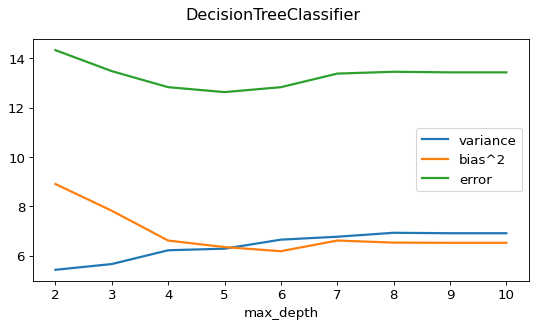

In [ ]:
from sklearn.model_selection import ShuffleSplit, train_test_split

# Bias-Variance Computation 
def compute_bias_variance(clf, X, y):
    # Bootstraps
    n_repeat = 40 # 40 is on the low side to get a good estimate. 100 is better.
    shuffle_split = ShuffleSplit(test_size=0.33, n_splits=n_repeat, random_state=0)

    # Store sample predictions
    y_all_pred = [[] for _ in range(len(y))]

    # Train classifier on each bootstrap and score predictions
    for i, (train_index, test_index) in enumerate(shuffle_split.split(X)):
        # Train and predict
        clf.fit(X[train_index], y[train_index])
        y_pred = clf.predict(X[test_index])

        # Store predictions
        for j,index in enumerate(test_index):
            y_all_pred[index].append(y_pred[j])

    # Compute bias, variance, error
    bias_sq = sum([ (1 - x.count(y[i])/len(x))**2 * len(x)/n_repeat 
                for i,x in enumerate(y_all_pred)])
    var = sum([((1 - ((x.count(0)/len(x))**2 + (x.count(1)/len(x))**2))/2) * len(x)/n_repeat
               for i,x in enumerate(y_all_pred)])
    error = sum([ (1 - x.count(y[i])/len(x)) * len(x)/n_repeat 
            for i,x in enumerate(y_all_pred)])

    return np.sqrt(bias_sq), var, error

def plot_bias_variance(clf, X, y):
    bias_scores = []
    var_scores = []
    err_scores = []
    max_depth= range(2,11)

    for i in max_depth:
        b,v,e = compute_bias_variance(clf.set_params(random_state=0,max_depth=i),X,y)
        bias_scores.append(b)
        var_scores.append(v)
        err_scores.append(e)

    plt.figure(figsize=(8,4))
    plt.rcParams.update({'font.size': 12})
    plt.suptitle(clf.__class__.__name__)
    plt.plot(max_depth, var_scores,label ="variance" )
    plt.plot(max_depth, np.square(bias_scores),label ="bias^2")
    plt.plot(max_depth, err_scores,label ="error" )
    plt.xlabel("max_depth")
    plt.legend(loc="best")
    plt.show()

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
dt = DecisionTreeClassifier()
plot_bias_variance(dt, X, y)

## Aprendizaje de ensambles
Ensambles (*Ensembles*) son métodos que combinan múltiples modelos de aprendizaje automático (modelos débiles) para crear modelos más potentes. Los más populares son:

* __Bagging__: Reduzca la varianza: construya muchos árboles en muestras aleatorias y vote sobre las predicciones
    * __RandomForests__: Construir árboles aleatorios sobre bootstraps aleatorios de los datos.
* __Boosting__: Reduzca el sesgo: construya árboles de forma iterativa, cada uno corrigiendo los errores de los árboles anteriores
    * __Adaboost__: Ensambles de árboles ponderados, importancia creciente de puntos mal clasificados
    * __Gradient boosting machines__: Actualizar gradualmente la importancia de los puntos difíciles hasta que el ensamble sea correcto
    * __XGBoost__: Implementación más rápida de gradient boosting machines
* __Stacking__: Crear un grupo de modelos base y entrene un metamodelo para aprender a combinar las predicciones del modelo base

### Bagging (Bootstrap Aggregating)
Reducir el sobreajuste promediando predicciones individuales (reducción de varianza)

* Tome una _bootstrap sample_ de los datos
    * Muestreo aleatorio con reemplazo
    * Construye un árbol en cada bootstrap
* Repetir `n_estimators` veces 
    * Valores más altos: más árboles, más suavizado.
    * Haga predicciones agregando las predicciones de árboles individuales
* Se puede hacer con cualquier modelo (pero generalmente con árboles)
    * Dado que Bagging solo reduce la varianza (no sesgo), tiene sentido usar modelos que son de alta varianza, de bajo sesgo
* RandomForest: Aleatorice árboles considerando solo un subconjunto aleatorio de características de tamaño `max_features` _en cada nodo_
    * Mayor varianza, menor sesgo que los árboles normales.
    * Pequeños `max_features` producen más árboles diferentes, más suavizado
  * Default: $sqrt(n\_features)$ para clasificación, $log2(n\_features)$ para regresión.


Haciendo predicciones:
* Clasificación: votación suave (softmax)
    * Cada integrante (árbol) devuelve una probabilidad para cada clase
    * Después de promediar, la clase con mayor probabilidad gana
* Regresión:  
    * Devuelve la _media_ de todas las predicciones
* Cada modelo base tiene el mismo peso en la predicción final

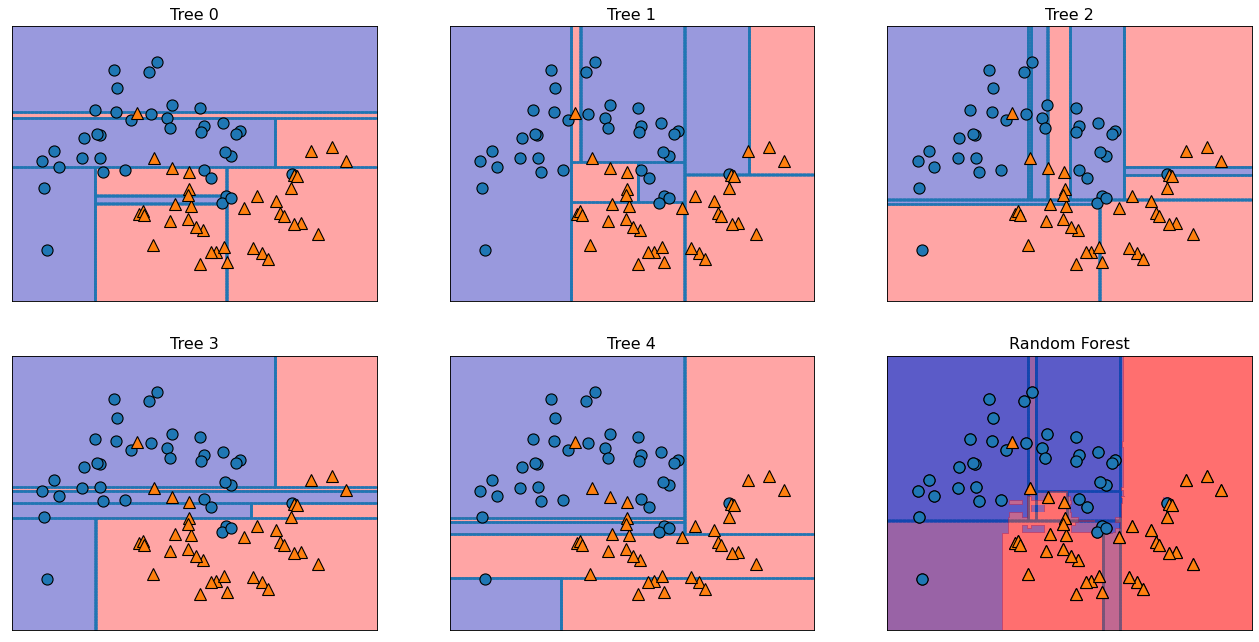

In [51]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=10, random_state=2)
forest.fit(X_train, y_train) 
 
plt.rcParams.update({'font.size': 12})
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train);

## Efecto en bias (sesgo) y variance (varianza)
* Aumentar el número de estimadores disminuye la varianza
* El sesgo no se ve afectado en su mayoría, pero aumentará si el forest se vuelve demasiado grande (muy suavizado)

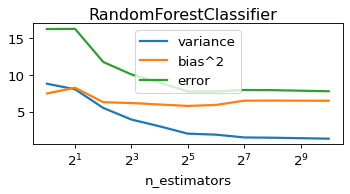

In [ ]:
#Este bloque tarda 4.5 min aprox en correr.
def plot_bias_variance_rf(clf, X, y):
    bias_scores = []
    var_scores = []
    err_scores = []
    n_estimators= [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

    for i in n_estimators:
        b,v,e = compute_bias_variance(clf.set_params(random_state=0,n_estimators=i),X,y)
        bias_scores.append(b)
        var_scores.append(v)
        err_scores.append(e)

    plt.figure(figsize=(5,2))
    plt.rcParams.update({'font.size': 12})
    plt.suptitle(clf.__class__.__name__)
    plt.plot(n_estimators, var_scores,label ="variance" )
    plt.plot(n_estimators, np.square(bias_scores),label ="bias^2")
    plt.plot(n_estimators, err_scores,label ="error" )
    plt.xscale('log',basex=2)
    plt.xlabel("n_estimators")
    plt.legend(loc="best")
    plt.show()

X, y = cancer.data, cancer.target
rf = RandomForestClassifier(random_state=0, n_estimators=512, n_jobs=-1)
plot_bias_variance_rf(rf, X, y)

Algoritmos en Scikit-learn:

- `RandomForestClassifier` (o Regressor)
- `ExtraTreesClassifier`: Crece árboles más profundos, más rápido

Los parámetros más importantes:

* `n_estimators` (mayor es mejor, pero rendimientos decrecientes)
    * Comenzará a sub-ajustarse (el componente de error de sesgo aumenta ligeramente)
* `max_features` (default es típicamente ok)
    * Establecer más pequeño para reducir los requisitos de espacio / tiempo.
* parámetros de los árboles, por ejemplo `max_depth` (menor efecto)

`n_jobs` establece el número de núcleos paralelos para ejecutar 
`random_state` debe ser fijado para la reproducibilidad

RandomForest permitir otra forma de evaluar el desempeño: out-of-bag (OOB) error

- Mientras crece el forest, estimar el error de prueba de las muestras de entrenamiento
- Para cada árbol construido, 33-36% de las muestras no se seleccionan en el bootstrap
    - Llamadas las muestras 'out of bootstrap' (OOB)
    - Las predicciones se hacen como si fueran muestras de prueba novedosas.
    - A través de la contabilidad, el voto mayoritario se calcula para todas las muestras OOB de todos los árboles
- OOB el error de prueba estimado es bastante preciso en la práctica
    - Tan bueno como las estimaciones de CV, pero se puede calcular sobre la marcha (sin ajuste repetido del modelo)
    - Tiende a ser un poco pesimista

En scikit-learn OOB error se devuelve de la siguiente manera:
```
oob_error = 1 - clf.oob_score_
```

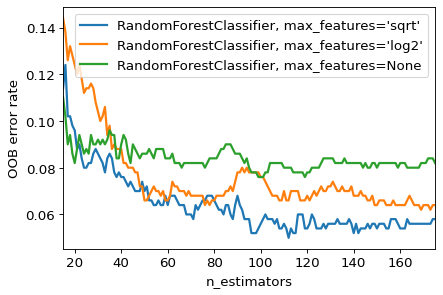

In [52]:
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

RANDOM_STATE = 123

# Generate a binary classification dataset.
X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=RANDOM_STATE)

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

#### Importancia de las características (atributos)
RandomForests proporciona importancias de característica más fiables, sobre la base de muchas hipótesis alternativas (árboles)

In [53]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0, max_depth=depth).fit(X_train, y_train)

forest = RandomForestClassifier(n_estimators=100, random_state=2)
forest.fit(X_train, y_train)

print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.9370629370629371


In [54]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.958041958041958


In [55]:
# Feature importances sum up to 1
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


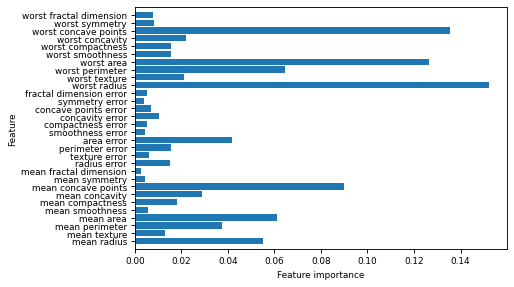

In [56]:
plt.rcParams.update({'font.size':8})
plot_feature_importances_cancer(forest)

#### Fortalezas, debilidades y parámetros.
RandomForest se encuentra entre los algoritmos más utilizados:

* No requiere mucho 'tuning'
* Modelos típicamente muy precisos
* Maneja bien las características heterogéneas
* Selecciona implícitamente las características más relevantes

Desventajas:

* Menos interpretable, más lento de entrenar (pero paralelizable)
* no funciona bien en datos dispersos (*sparse*) de alta dimensión (por ejemplo, texto)

## Adaptive Boosting (AdaBoost)
* Construye un ensamble de modelos débiles ponderados (_weighted_ weak learners)
    * Típicamente árboles poco profundos o tocones (stump,  one-level decision tree)
* Cada modelo base intenta corregir los errores de los anteriores.
    * Secuencial, no paralelo (como RandomForest)
    * Damos más peso a las muestras mal clasificadas
* Forzar el próximo modelo para obtener (clasificar) estos puntos correctamente, ya sea:
    * Transmitir el peso a la pérdida (por ejemplo weighted Gini index)
    * Muestrear los datos con probabilidad = pesos de las muestras
        * Las muestras mal clasificadas se muestrean varias veces para que obtengan un mayor peso
* Hacer un voto ponderado sobre todos los modelos

## AdaBoost algorithm
* Restablecer pesos de muestra a $\frac{1}{N}$
* Construye un modelo, usando su propio algoritmo (pro ejemplo árboles con índice de Gini)
* Dale un peso relacionado con su error $E$
$$w_{i} =  \frac{1}{2}\log(\frac{1-E}{E})$$
    * Agregue un pequeño error mínimo a E para evitar infinitos
* Actualizar los pesos de muestras
    * Aumente el peso de las muestras predichas incorrectamente:
$s_{n,i+1} = s_{n,i}e^{w_i}$
    * Disminuya el peso de las muestras predichas correctamente:
$s_{n,i+1} = s_{n,i}e^{-w_i}$
    * Normalizar pesos para que sumen 1
* Muestreé nuevos puntos de acuerdo a $s_{n,i+1}$
* Repita para $I$ rondas

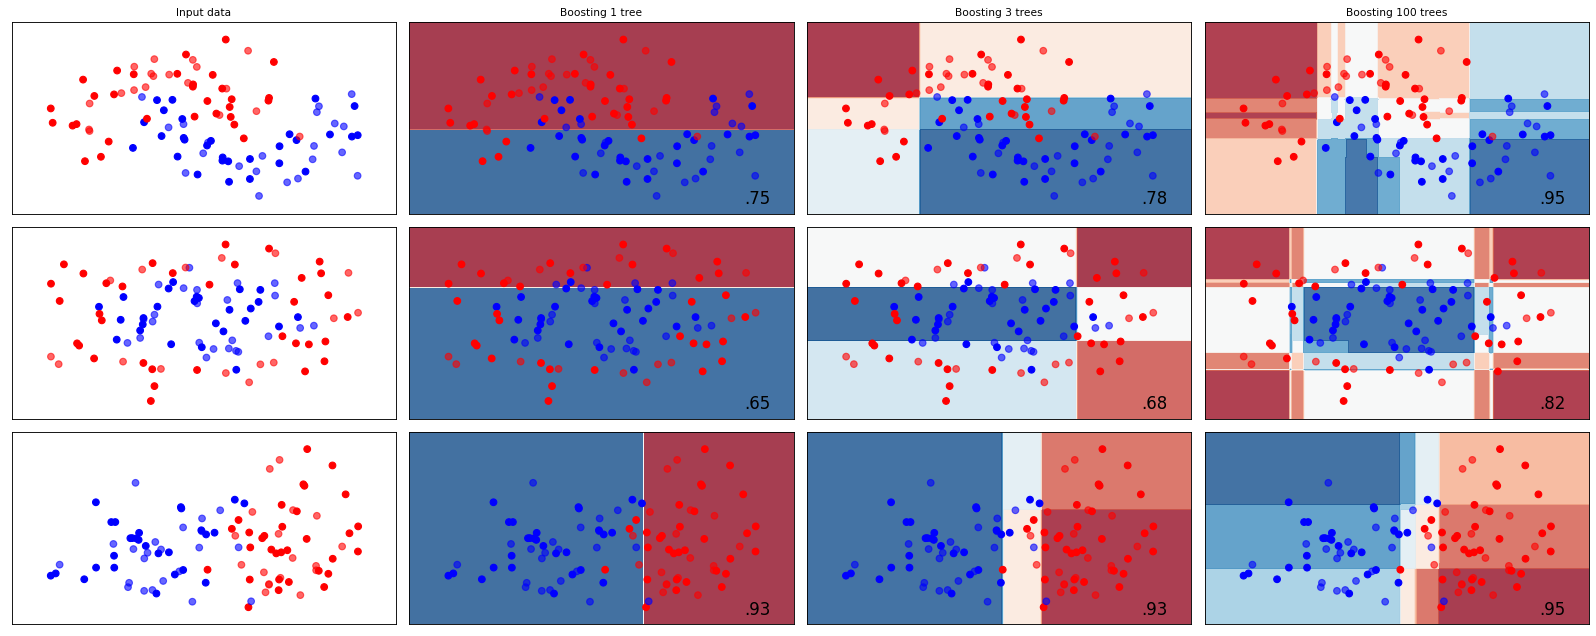

In [58]:
from sklearn.ensemble import AdaBoostClassifier
names = ["Boosting 1 tree", "Boosting 3 trees", "Boosting 100 trees"]

classifiers = [
    AdaBoostClassifier(n_estimators=1, random_state=0, learning_rate=0.5),
    AdaBoostClassifier(n_estimators=3, random_state=0, learning_rate=0.5),
    AdaBoostClassifier(n_estimators=100, random_state=0, learning_rate=0.5)
    ]

plot_classifiers(names, classifiers, figuresize=(20,8))  

AdaBoost reduce el sesgo (y un poco de la varianza)
* Demasiado Boosting aumentará eventualmente la varianza

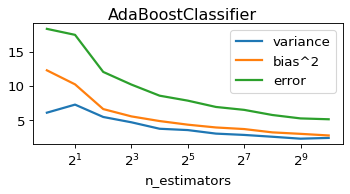

In [ ]:
# Tarda 3.5 min aprox. en correr
from sklearn.ensemble import AdaBoostClassifier
X, y = cancer.data, cancer.target
ab = AdaBoostClassifier(random_state=0, n_estimators=1024)
plot_bias_variance_rf(ab, X, y)

## AdaBoost resumen
* Representación: ensamble ponderado de modelos base
    * Los modelos base pueden ser construidos por cualquier algoritmo
* Función de pérdida: función de pérdida ponderada de modelos base
* Optimización: búsqueda glotona

## Gradient Boosted Regression Trees (Gradient Boosting Machines)
Varias diferencias con AdaBoost:
* Comience con una conjetura inicial (por ejemplo, 1 hoja, valor promedio de todas las muestras)
* Los modelos base son árboles poco profundos (profundidad 2-4, no tocones)
* Los modelos se ponderan (escalan) por la misma cantidad (tasa de aprendizaje)
* Los modelos posteriores tienen como objetivo predecir el error del modelo anterior.
    * _Modelo aditivo_: la predicción final es la suma de todas las predicciones de los modelos base
* Iterar hasta que se construyan los $I$ árboles (o el error converge)



## Intuición de GradientBoosting
* Hacer predicción inicial $M_0$ (por ejemplo, valor objetivo promedio)
* Calcular el _pseudo-residuo_ (error) para cada muestra $n$: $r_{n} = y_n - y^{(M_{i})}_n$
  * Donde $y^{(M_{i})}_n$ es la predicción para $y_n$ por el modelo $M_{i}$


* Construya un nuevo modelo $ M_1 $ para predecir el pseudo residuo de $M_0$
* Nueva predicción en el paso $I$:
$$y_{n} = y^{(M_{i-1})}_n + \lambda * y^{(M_{i})}_n = y^{(M_{0})}_n + \sum_{i=1}^I \lambda * y^{(M_{i})}_n$$
    * $\lambda$ es la tasa de aprendizaje (o _shrinkage_)
    * Tomar pequeños pasos en la dirección correcta reduce la varianza
* Calcular nuevos pseudo-residuos, y repetir
    * Cada paso, los pseudo-residuos se hacen más pequeños
* Detener después de un número dado de iteraciones, o cuando los residuos ya no disminuyan (detención anticipada)

## GradientBoosting Algorithm

* Conjunto de datos de $n$ puntos $D = \{(x_i,y_i)\}_{i=1}^{n}$ donde $y_i$ es un objetivo numérico
* Función de pérdida diferenciable $\mathcal{L}(y_i,F(x))$
    * Más común: $\mathcal{L}= \frac{1}{2}(y_i - \hat{y}_i)^2$
    * $\frac{\partial \mathcal{L}}{\partial \hat{y}} = 2 * \frac{1}{2}(y_i - \hat{y}_i) * (-1)$
* Inicializar modelo con valor constante $F_0(x) = \underset{\gamma}{\operatorname{argmin}}\sum_{i=1}^{n}\mathcal{L}(y_i,\gamma)$
    * Para $\mathcal{L}= \frac{1}{2}(y_i - \hat{y}_i)^2$, este es el promedio de todas las observaciones
* For m=1..M (ej. M=100 árboles):
  * For i=1..n, calcular pseudo residuos $r_{im} = - \left[ \frac{\partial \mathcal{L}(y_i,F(x_i))}{\partial F(x_i)} \right]_{F(x)=F_{m-1}(x)}$
  * Ajustar un modelo de regresión a $r_{im}$, crear regiones terminales (también conocido como hojas) $R_{jm}, j=1..J_m$
  * Para cada j, calcular $\gamma_{jm} = \underset{\gamma}{\operatorname{argmin}}\sum_{x_i \in R_{ij}}\mathcal{L}(y_i,F_{m-1}(x_i) + \gamma)$
  * Actualizar $F_{m}(x) = F_{m-1}(x) + \nu \sum_{j=1}^{J_m} \gamma_m I(x \in R_{jm})$





### Tuning (ajuste)
- n_estimators: Más alto es mejor, pero comenzará a sobreajustar
- learning_rate: Tasas más bajas significan que se necesitan más árboles para obtener modelos más complejos
    - Regularizador principal, también conocido como 'shrinkage'
    - Fijar n_estimators lo más alto posible, luego ajustar (tune) learning_rate
- max_depth: Típicamente se mantiene bajo (<5), reducir cuando se produce sobreajuste
- loss: Función de pérdida utilizada para el descenso de gradiente (valores predeterminados OK)
    - Clasificación:
        - `deviance` (default): log-likelihood loss (tal como en logistic regression)
        - `exponential`: exponential loss (AdaBoost algorithm)
    - Regresión:
        - `ls`: Least squares (típicamente la mejor opción)

``` python
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
```

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


``` python
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
```

In [60]:
# We are overfitting. We can decrease max_depth
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


``` python
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
```

In [61]:
# or decrease the learning rate (less effect) 
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train) 

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


Gradient boosting machines usa árboles mucho más simples
- Por lo tanto, tiende a ignorar por completo algunas de las características

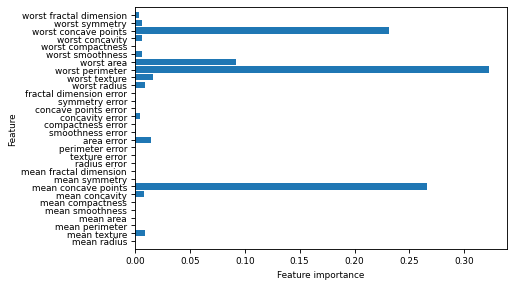

In [62]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

##### Fortalezas, debilidades y parámetros
* Entre los modelos más potentes y ampliamente utilizados
* Funciona bien en características heterogéneas y diferentes escalas
* Requiere un ajuste cuidadoso, toma más tiempo entrenar
* No funciona bien en datos dispersos (sparse) de alta dimensión

Hiperparámetros principales:

* `n_estimators`: Más alto es mejor, pero comenzará a sobreajustar
* `learning_rate`: Tasas más bajas significan que se necesitan más árboles para obtener modelos más complejos
    * Fijar `n_estimators` lo más alto posible, luego ajustar (tune) `learning_rate`
* `max_depth`: Típicamente se mantiene bajo (<5), reducir cuando se sobreajusta

### XGBoost

XGBoost es otra librería de python para gradient boosting (instalar por separado). 

- La principal diferencia radica en el uso de técnicas de aproximación para hacerlo más rápido.
    - Por lo tanto, puede hacer 10x (o 100x) más iteraciones de boosting en la misma cantidad de tiempo
- Sketching: Dadas 10000 posibles divisiones, solo considerará 300 divisiones "suficientemente buenas" por defecto
    - Controlado por el parámetro `sketch_eps` (por defecto 0.03)
- Aproximación de la función de pérdida con Expansión de Taylor: forma más eficiente de evaluar divisiones
- Permite graficar la curva de aprendizaje
- Permite detenerse y continuar más tarde (warm-start)

Leer más en:
[XGBoost Documentation](https://xgboost.readthedocs.io/en/latest/index.html)

[Paper](https://arxiv.org/pdf/1603.02754.pdf)

[Usando XGBoost con Scikit-learn](https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn)


Comparación

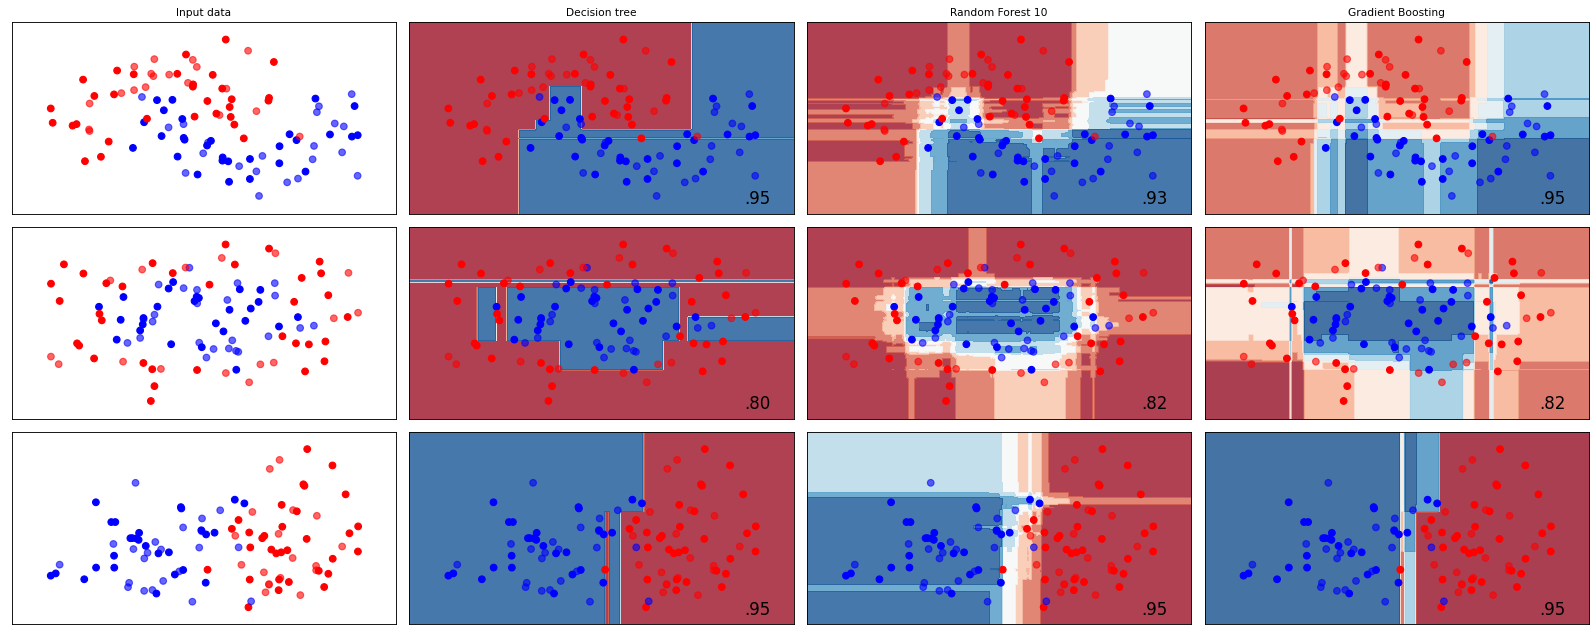

In [ ]:
names = ["Decision tree", "Random Forest 10", "Gradient Boosting"]

classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=100, max_features=1),
    GradientBoostingClassifier(random_state=0, learning_rate=0.5)
    ]

plot_classifiers(names, classifiers, figuresize=(20,8))

### Una mirada general de los algoritmos vistos

| Name | Representation | Loss function | Optimization | Regularization |
|---|---|---|---|---|
| Classification trees | Decision tree | Information Gain (KL div.) / Gini index | Hunt's algorithm | Tree depth,... |
| Regression trees | Decision tree | Min. quadratic distance | Hunt's algorithm | Tree depth,... |
| Model trees | Decision tree + other models in leafs | As above + used model's loss | Hunt's algorithm + used model's optimization | Tree depth,... |
| Bagging | Ensemble of any model | / | / | Number of models,... |
| RandomForest | Ensemble of random trees | / | / | Number of trees,... |
| AdaBoost | Ensemble of models (trees) | Weighted loss of base models | Greedy search | Number of trees,... |
| GradientBoosting | Ensemble of models (trees) | Ensemble loss | Gradient descent | Number of trees,... |

### Resumen
- Bagging / RandomForest es una técnica de reducción de varianza
    - Construye muchos modelos de alta varianza (sobreajuste)
        - Árboles de decisión típicamente profundos (aleatorios)
        - Cuanto más diferentes sean los modelos, mejor
    - La agregación (votación suave o promedio) reduce la varianza
    - Se puede paralelizar fácilmente
- Boosting es una técnica de reducción de sesgo
    - Construye muchos modelos de alto sesgo (underfitting)
        - Típicamente árboles de decisión poco profundos
        - Los pesos de las muestras se actualizan para crear diferentes árboles
    - La agregación (votación suave o promedio) reduce el sesgo
    - No se puede paralelizar fácilmente
- También puede construir ensambles con otros modelos
    - Especialmente si muestran alta varianza o sesgo
- También es posible construir ensambles _heterogéneos_
    - Modelos de diferentes algoritmos
    - A menudo, un metaclasificador se entrena con las predicciones: Stacking